In [47]:
import matplotlib.pyplot as plt
import pymysql
import pandas as pd
import plotly.express as px
import koreanize_matplotlib

# 이동 사유별 데이터 다운 

In [ ]:
conn  = pymysql.connect(host='', 
                        user='master', 
                        password, 
                        db='edaproject', 
                        charset='utf8')
cursor = conn.cursor()

query = """
SELECT * FROM MOVEOUT_BY_REASON_YEARLY;
"""
cursor.execute(query)
result = cursor.fetchall()

moveout_reason = pd.DataFrame(result)
moveout_reason.columns = [desc[0] for desc in cursor.description]

query = """
SELECT * FROM MOVEIN_BY_REASON_YEARLY;
"""
cursor.execute(query)
result = cursor.fetchall()
movein_reason = pd.DataFrame(result)
movein_reason.columns = [desc[0] for desc in cursor.description]

conn.close()

In [27]:
movein_reason.head()

,ID,YEAR,SIDO,REASON,COUNT
0,1,2013,전국,계,2423429
1,2,2013,전국,직업,763668
2,3,2013,전국,가족,659652
3,4,2013,전국,주택,567194
4,5,2013,전국,교육,127392


In [26]:
print(moveout_reason["SIDO"].unique())
print(movein_reason["REASON"].unique())

['전국' '서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시' '세종특별자치시'
 '경기도' '강원특별자치도' '충청북도' '충청남도' '전북특별자치도' '전라남도' '경상북도' '경상남도' '제주특별자치도']
['계' '직업' '가족' '주택' '교육' '주거환경' '자연환경' '기타']


# 가구 수 별 이동 데이터 다운

In [ ]:
conn  = pymysql.connect(host='', 
                        user='master', 
                        password, 
                        db='edaproject', 
                        charset='utf8')
cursor = conn.cursor()

query = """
SELECT * FROM MOVEOUT_BY_HOUSEHOLD_YEARLY;
"""
cursor.execute(query)
result = cursor.fetchall()

moveout_household = pd.DataFrame(result)
moveout_household.columns = [desc[0] for desc in cursor.description]

query = """
SELECT * FROM MOVEIN_BY_HOUSEHOLD_YEARLY;
"""
cursor.execute(query)
result = cursor.fetchall()
movein_household = pd.DataFrame(result)
movein_household.columns = [desc[0] for desc in cursor.description]

conn.close()

In [31]:
moveout_household_total = moveout_household[moveout_household["HOUSEHOLD"] == "계"]
movein_household_total = movein_household[movein_household["HOUSEHOLD"] == "계"]



In [36]:
moveout_household["SIDO"].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도', '세종특별자치시'], dtype=object)

# 시도 순이동 

In [ ]:
conn  = pymysql.connect(host='', 
                        user='master', 
                        password, 
                        db='edaproject', 
                        charset='utf8')
cursor = conn.cursor()

query = """
    SELECT * FROM SIDO_PUREMOVE_YEARLY;
"""
cursor.execute(query)
result = cursor.fetchall()

sido_puremove = pd.DataFrame(result)
sido_puremove.columns = [desc[0] for desc in cursor.description]


conn.close()

# 서울특별시 경기도 순 이동 추이

In [61]:
sido_puremove.head()

,sido,year,month,move_count
0,서울특별시,2001,1,2464
1,부산광역시,2001,1,-1252
2,대구광역시,2001,1,-306
3,인천광역시,2001,1,531
4,광주광역시,2001,1,595


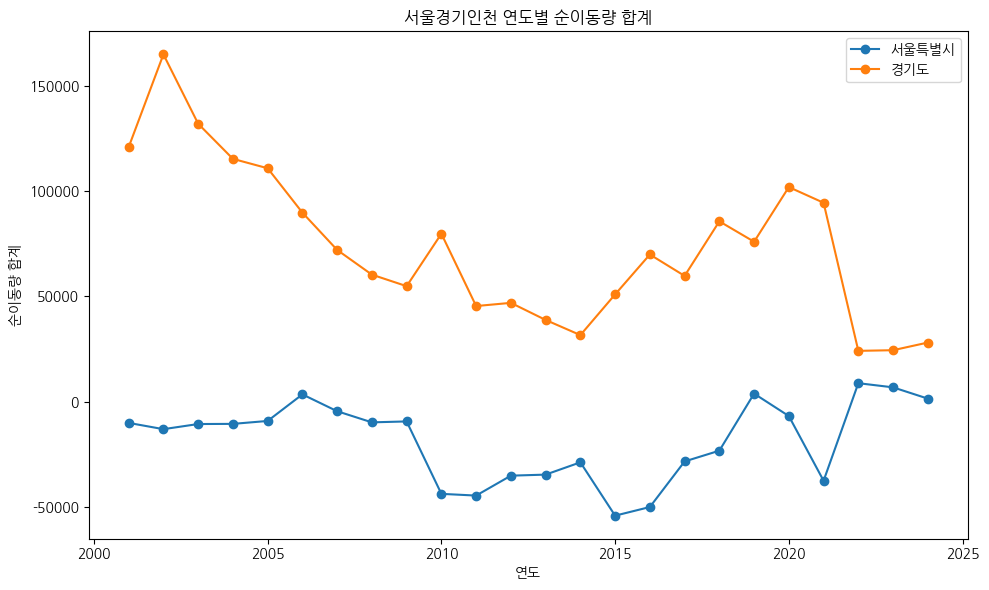

In [62]:

# 서울특별시와 경기도 필터링
seoul_data = sido_puremove[sido_puremove['sido'] == '서울특별시']
gyeonggi_data = sido_puremove[sido_puremove['sido'] == '경기도']
# incheon_data = sido_puremove[sido_puremove['sido'] == '인천광역시']

# 연도별 순이동량 합계 계산
seoul_yearly = seoul_data.groupby('year')['move_count'].sum().reset_index()
gyeonggi_yearly = gyeonggi_data.groupby('year')['move_count'].sum().reset_index()
# incheon_yearly = incheon_data.groupby('year')['move_count'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(seoul_yearly['year'], seoul_yearly['move_count'], label='서울특별시', marker='o')
plt.plot(gyeonggi_yearly['year'], gyeonggi_yearly['move_count'], label='경기도', marker='o')
# plt.plot(incheon_yearly['year'], incheon_yearly['move_count'], label='인천광역시', marker='o')
# 그래프 제목 및 라벨
plt.title('서울경기인천 연도별 순이동량 합계')
plt.xlabel('연도')
plt.ylabel('순이동량 합계')
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

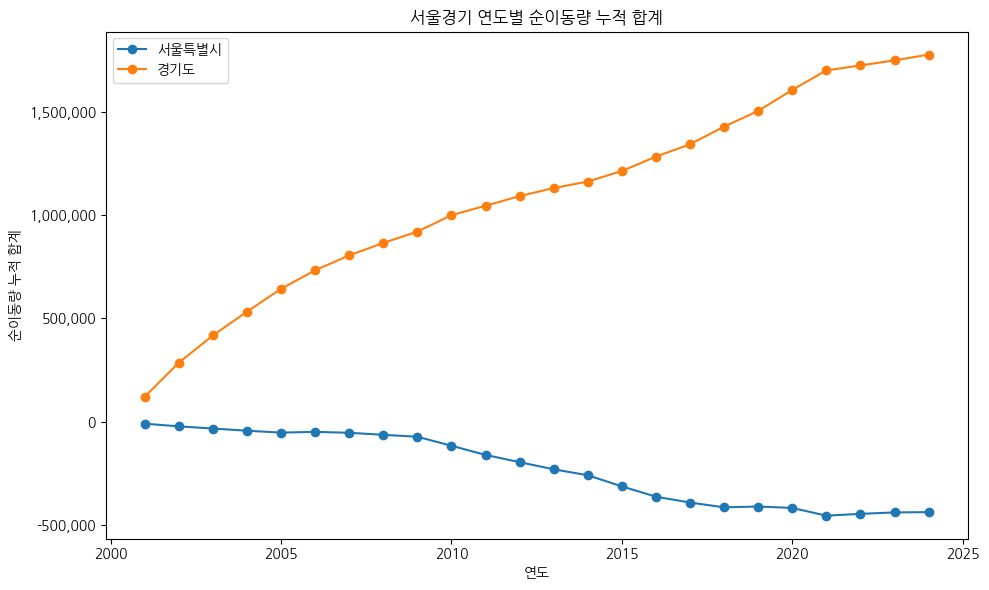

In [65]:
# 순이동량 누적 합계
seoul_yearly['누적_순이동'] = seoul_yearly['move_count'].cumsum()
gyeonggi_yearly['누적_순이동'] = gyeonggi_yearly['move_count'].cumsum()

# 누적 순이동 시각화
plt.figure(figsize=(10, 6))

plt.plot(seoul_yearly['year'], seoul_yearly['누적_순이동'], marker='o', label='서울특별시')
plt.plot(gyeonggi_yearly['year'], gyeonggi_yearly['누적_순이동'], marker='o', label='경기도')

plt.title('서울경기 연도별 순이동량 누적 합계')
plt.xlabel('연도')
plt.ylabel('순이동량 누적 합계')
plt.legend()

# y축 수치 값을 그대로 표시
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()



In [64]:
# plotly를 사용하여 그래프 그리기
import plotly.express as px

# 데이터 준비
seoul_yearly['지역'] = '서울특별시'
gyeonggi_yearly['지역'] = '경기도'
combined_data = pd.concat([seoul_yearly, gyeonggi_yearly])

# plotly를 사용한 그래프 생성
fig = px.line(combined_data, x='year', y='move_count', color='지역', 
              title='서울특별시와 경기도 연도별 순이동량 합계',
              labels={'year': '연도', 'move_count': '순이동량 합계', '지역': '지역'},
              markers=True)

# 그래프 레이아웃 설정
fig.update_layout(
    xaxis_title='연도',
    yaxis_title='순이동량 합계',
    legend_title='지역',
    font=dict(size=12),
    width=800  # 가로 길이를 600픽셀로 지정
)

# 그래프 표시
fig.show()


In [32]:
moveout_household_total.head()

,ID,YEAR,MONTH,SIDO,HOUSEHOLD,MOVE_AMOUNT
6,7,2004,1,부산광역시,계,8331
13,14,2004,1,대구광역시,계,6416
20,21,2004,1,인천광역시,계,6935
27,28,2004,1,광주광역시,계,4949
34,35,2004,1,대전광역시,계,4925


In [3]:
print(moveout_reason.head())
print(movein_reason.head())

   ID  YEAR SIDO REASON    COUNT
0   1  2013   전국      계  2423429
1   2  2013   전국     직업   763668
2   3  2013   전국     가족   659652
3   4  2013   전국     주택   567194
4   5  2013   전국     교육   127392
   ID  YEAR SIDO REASON    COUNT
0   1  2013   전국      계  2423429
1   2  2013   전국     직업   763668
2   3  2013   전국     가족   659652
3   4  2013   전국     주택   567194
4   5  2013   전국     교육   127392


# 아파트 시도별 평균 매매가 다운

In [ ]:
import pymysql
import pandas as pd

conn  = pymysql.connect(host='', 
                        user='master', 
                        password, 
                        db='edaproject', 
                        charset='utf8')
cursor = conn.cursor()

query = """
    SELECT * FROM APARTMENT_AVG_PRICE_SIDO_MONTHLY;
"""
cursor.execute(query)
result = cursor.fetchall()

sido_price = pd.DataFrame(result)
sido_price.columns = [desc[0] for desc in cursor.description]


conn.close()


In [5]:
sido_price.head()

,YEAR,MONTH,SIDO,PRICE
0,2014,1,서울,490995000
1,2014,1,경기,264497000
2,2014,1,인천,208264000
3,2014,1,수도권,321252000
4,2014,2,서울,492451000


# 아파트 시도별 평균 매매가 그래프 시각화

/tmp/ipykernel_1386/1908627245.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1386/1908627245.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



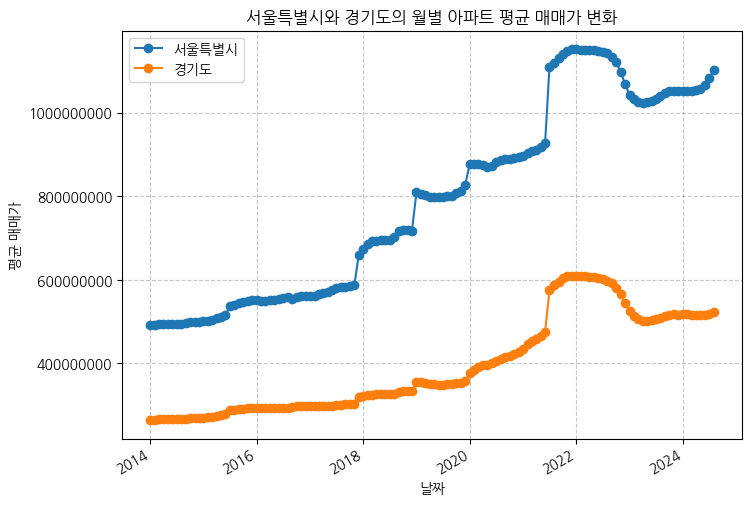

In [66]:
# matplotlib 라이브러리 임포트
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 서울과 경기도 데이터 필터링
seoul_data = sido_price[sido_price['SIDO'] == '서울']
gyeonggi_data = sido_price[sido_price['SIDO'] == '경기']

# 날짜 컬럼 생성
seoul_data['DATE'] = pd.to_datetime(seoul_data['YEAR'].astype(str) + '-' + seoul_data['MONTH'].astype(str).str.zfill(2))
gyeonggi_data['DATE'] = pd.to_datetime(gyeonggi_data['YEAR'].astype(str) + '-' + gyeonggi_data['MONTH'].astype(str).str.zfill(2))

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(seoul_data['DATE'], seoul_data['PRICE'], label='서울특별시', marker='o')
plt.plot(gyeonggi_data['DATE'], gyeonggi_data['PRICE'], label='경기도', marker='o')

# 그래프 제목 및 라벨
plt.title('서울특별시와 경기도의 월별 아파트 평균 매매가 변화')
plt.xlabel('날짜')
plt.ylabel('평균 매매가')
plt.legend()

# x축 날짜 포맷 설정
plt.gcf().autofmt_xdate()

# 그리드 표시
plt.grid(True, linestyle='--', alpha=0.7)

# y축 값 표시 설정
plt.ticklabel_format(style='plain', axis='y')

# 그래프 표시
plt.show()



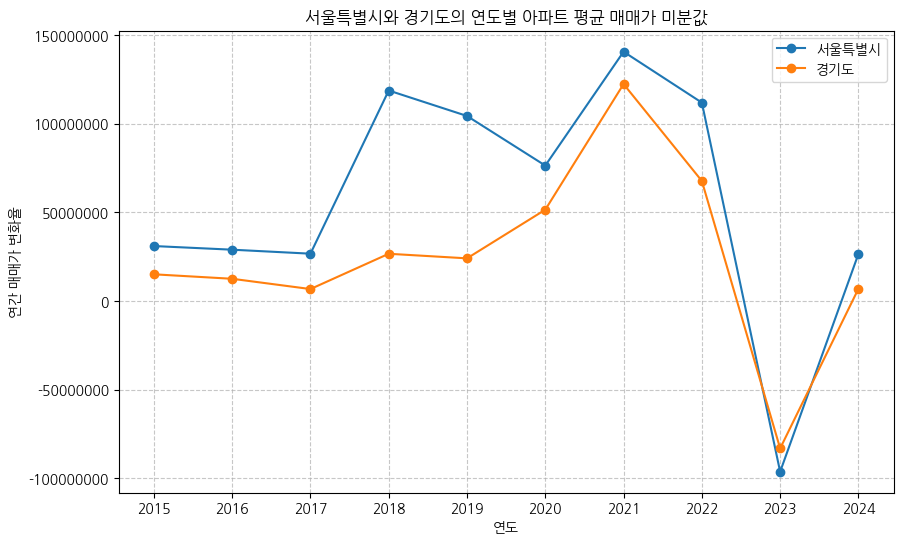

In [69]:
# 연도별 매매가 평균의 미분값 그래프

# 서울과 경기도의 연도별 평균 매매가 계산
seoul_yearly = seoul_data.groupby('YEAR')['PRICE'].mean().reset_index()
gyeonggi_yearly = gyeonggi_data.groupby('YEAR')['PRICE'].mean().reset_index()

# 연도별 매매가 미분값 계산
seoul_yearly['PRICE_DIFF'] = seoul_yearly['PRICE'].diff()
gyeonggi_yearly['PRICE_DIFF'] = gyeonggi_yearly['PRICE'].diff()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(seoul_yearly['YEAR'][1:], seoul_yearly['PRICE_DIFF'][1:], label='서울특별시', marker='o')
plt.plot(gyeonggi_yearly['YEAR'][1:], gyeonggi_yearly['PRICE_DIFF'][1:], label='경기도', marker='o')

# 그래프 제목 및 라벨
plt.title('서울특별시와 경기도의 연도별 아파트 평균 매매가 미분값')
plt.xlabel('연도')
plt.ylabel('연간 매매가 변화율')
plt.legend()

# x축 연도 포맷 설정
plt.xticks(seoul_yearly['YEAR'][1:])

# 그리드 표시
plt.grid(True, linestyle='--', alpha=0.7)

# y축 값 표시 설정
plt.ticklabel_format(style='plain', axis='y')

# 그래프 표시
plt.show()


In [ ]:
import pymysql
import pandas as pd

conn  = pymysql.connect(host='', 
                        user='master', 
                        password, 
                        db='edaproject', 
                        charset='utf8')
cursor = conn.cursor()

query = """
    SELECT * FROM SUPPLY_TRENDS_BY_CATEGORY;
"""
cursor.execute(query)
result = cursor.fetchall()

suply_trends = pd.DataFrame(result)
suply_trends.columns = [desc[0] for desc in cursor.description]


conn.close()


In [21]:
df = suply_trends

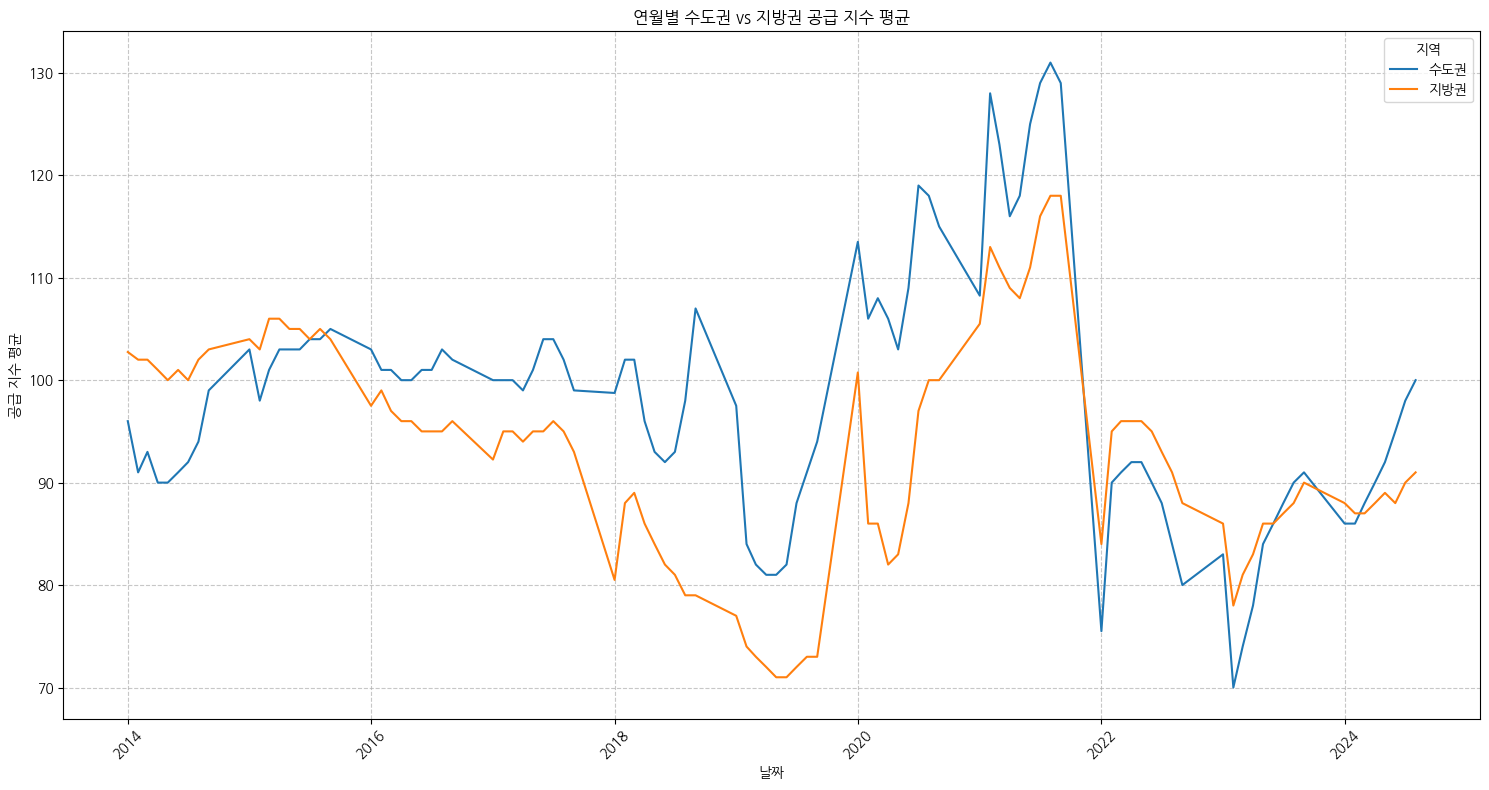

In [38]:
# 연월별 시각화
df_grouped = df.groupby(['YEAR', 'MONTH', 'CATEGORY'])['SUPPLY_INDEX'].mean().reset_index()
df_grouped['DATE'] = pd.to_datetime(df_grouped['YEAR'].astype(str) + '-' + df_grouped['MONTH'].astype(str).str.zfill(2))

df_grouped = df_grouped.sort_values('DATE')

# 시각화
plt.figure(figsize=(15, 8))

# 수도권과 지방권 구분하여 연월별 시각화
for category in df_grouped['CATEGORY'].unique():
    subset = df_grouped[df_grouped['CATEGORY'] == category]
    plt.plot(subset['DATE'], subset['SUPPLY_INDEX'], label=category)

# 그래프 설정
plt.xlabel('날짜')
plt.ylabel('공급 지수 평균')
plt.title('연월별 수도권 vs 지방권 공급 지수 평균')
plt.legend(title="지역")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

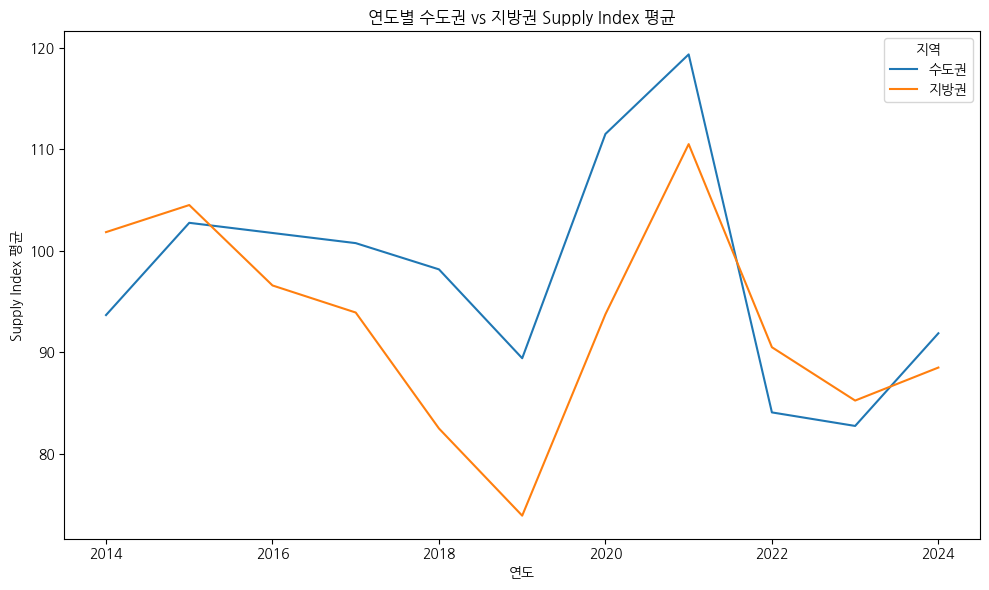

In [27]:
# 연도별 합계 계산
df_grouped = df.groupby(['YEAR', 'CATEGORY'])['SUPPLY_INDEX'].mean().reset_index()
# 시각화
plt.figure(figsize=(10, 6))

# 수도권과 지방권 구분하여 연도별 합계 시각화
for category in df_grouped['CATEGORY'].unique():
    subset = df_grouped[df_grouped['CATEGORY'] == category]
    plt.plot(subset['YEAR'], subset['SUPPLY_INDEX'], label=category)

# 그래프 설정
plt.xlabel('연도')
plt.ylabel('Supply Index 평균')
plt.title('연도별 수도권 vs 지방권 Supply Index 평균')
plt.legend(title="지역")
plt.tight_layout()
plt.show()

In [26]:
# plotly를 사용한 시각화
import plotly.graph_objects as go

# 각 카테고리에 대한 트레이스 생성
traces = []
for category in df_grouped['CATEGORY'].unique():
    subset = df_grouped[df_grouped['CATEGORY'] == category]
    trace = go.Scatter(
        x=subset['YEAR'],
        y=subset['SUPPLY_INDEX'],
        mode='lines+markers',
        name=category
    )
    traces.append(trace)

# 레이아웃 설정
layout = go.Layout(
    title='연도별 수도권 vs 지방권 Supply Index 평균',
    xaxis=dict(title='연도'),
    yaxis=dict(title='Supply Index 평균'),
    legend=dict(title="지역"),
    hovermode='closest',
    width=800
)

# 그래프 생성 및 표시
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [ ]:
import pymysql
import pandas as pd

conn  = pymysql.connect(host='', 
                        user='master', 
                        password, 
                        db='edaproject', 
                        charset='utf8')
cursor = conn.cursor()

query = """
    SELECT * FROM INTEREST_RATE;
"""
cursor.execute(query)
result = cursor.fetchall()

interest_rate = pd.DataFrame(result)
interest_rate.columns = [desc[0] for desc in cursor.description]


conn.close()

In [29]:
interest_rate.head()

,DATE,RATE
0,2014-08-14,2.25
1,2014-10-15,2.00
2,2015-03-12,1.75
3,2015-06-11,1.50
4,2016-06-09,1.25


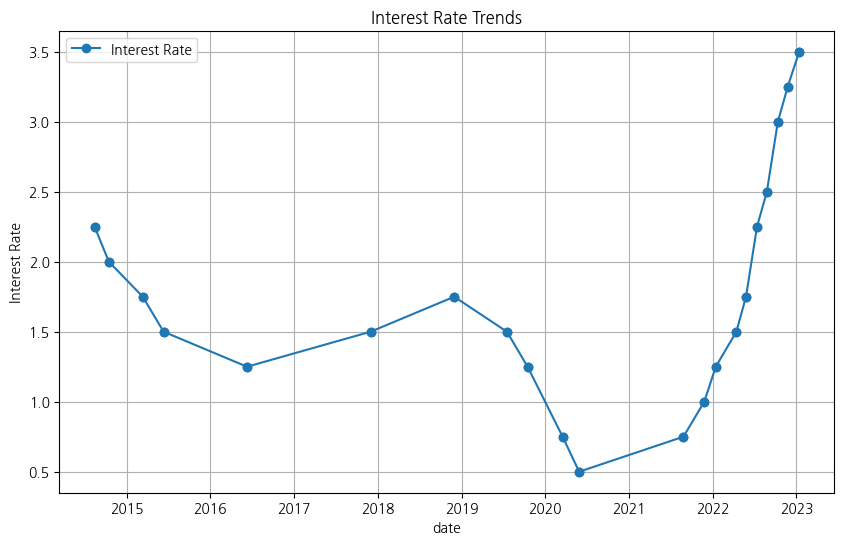

In [35]:
interest_rate['DATE'] = pd.to_datetime(interest_rate['DATE'])

interest_rate = interest_rate.sort_values('DATE')

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(interest_rate['DATE'], interest_rate['RATE'], label='Interest Rate', marker='o')
plt.xlabel('date')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Trends')
plt.legend()
plt.grid(True)


In [34]:
# plotly를 사용한 시각화
import plotly.graph_objects as go

# 데이터 준비
fig = go.Figure()

interest_rate['DATE'] = pd.to_datetime(interest_rate['DATE'])

interest_rate = interest_rate.sort_values('DATE')

# 선 그래프 추가
fig.add_trace(go.Scatter(x=interest_rate['DATE'], y=interest_rate['RATE'],
                         mode='lines+markers',
                         name='이자율'))

# 그래프 레이아웃 설정
fig.update_layout(
    title='이자율 추세',
    xaxis_title='날짜',
    yaxis_title='이자율',
    template='plotly_white',
    width=800
)

# 그래프 표시
fig.show()


# 1인 가구 데이터 다운

In [ ]:
import pymysql
import pandas as pd

conn  = pymysql.connect(host='', 
                        user='master', 
                        password, 
                        db='edaproject', 
                        charset='utf8')
cursor = conn.cursor()

query = """
    SELECT * FROM household_type_by_sido_yearly;
"""
cursor.execute(query)
result = cursor.fetchall()

hosehold_by_sido = pd.DataFrame(result)
hosehold_by_sido.columns = [desc[0] for desc in cursor.description]


conn.close()

In [4]:
hosehold_by_sido.head()

,sido,year,household_count,one_person_household_count
0,강원도,2010,557751,155453
1,강원도,2015,606117,189379
2,강원도,2016,616346,197917
3,강원도,2017,620729,199645
4,강원도,2018,628484,206295


In [5]:
# 서울특별시와 경기도의 1인 가구 및 다인 가구 데이터 시각화
# 서울특별시와 경기도 데이터 필터링
seoul_gyeonggi = hosehold_by_sido[hosehold_by_sido['sido'].isin(['서울특별시', '경기도'])]

# 데이터 타입 변환
seoul_gyeonggi['household_count'] = seoul_gyeonggi['household_count'].astype(int)
seoul_gyeonggi['one_person_household_count'] = seoul_gyeonggi['one_person_household_count'].astype(int)

# 다인 가구 수 계산
seoul_gyeonggi['multi_person_household_count'] = seoul_gyeonggi['household_count'] - seoul_gyeonggi['one_person_household_count']

/tmp/ipykernel_19683/2710690456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_gyeonggi['household_count'] = seoul_gyeonggi['household_count'].astype(int)
/tmp/ipykernel_19683/2710690456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_gyeonggi['one_person_household_count'] = seoul_gyeonggi['one_person_household_count'].astype(int)
/tmp/ipykernel_19683/2710690456.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [6]:
seoul_gyeonggi

,sido,year,household_count,one_person_household_count,multi_person_household_count
9,경기도,2010,3831134,777360,3053774
10,경기도,2015,4384742,1026471,3358271
11,경기도,2016,4484424,1067916,3416508
12,경기도,2017,4602950,1124541,3478409
13,경기도,2018,4751497,1197586,3553911
14,경기도,2019,4907660,1290893,3616767
15,경기도,2020,5098431,1406010,3692421
16,경기도,2021,5290662,1543100,3747562
17,경기도,2022,5406963,1634147,3772816
90,서울특별시,2010,3504297,854606,2649691


In [7]:


# 데이터 시각화
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 서브플롯 생성
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# 각 지역별로 데이터 추가
colors = {'서울특별시': ['blue', 'lightblue'], '경기도': ['red', 'pink']}

for sido in ['서울특별시', '경기도']:
    data = seoul_gyeonggi[seoul_gyeonggi['sido'] == sido]
    
    # 다인 가구 데이터 추가
    fig.add_trace(
        go.Scatter(x=data['year'], y=data['multi_person_household_count'],
                   mode='lines+markers',
                   name=f'{sido} 다인 가구',
                   line=dict(color=colors[sido][0])),
        row=1, col=1
    )
    
    # 1인 가구 데이터 추가
    fig.add_trace(
        go.Scatter(x=data['year'], y=data['one_person_household_count'],
                   mode='lines+markers',
                   name=f'{sido} 1인 가구',
                   line=dict(color=colors[sido][1])),
        row=1, col=1
    )

# 레이아웃 설정
fig.update_layout(
    title='서울특별시와 경기도의 1인 가구 및 다인 가구 비교',
    xaxis_title='연도',
    yaxis_title='가구 수',
    legend_title='가구 유형',
    height=600,
    width=1000
)

# x축 설정
fig.update_xaxes(tickmode='linear', dtick=1)


# y축 설정
fig.update_yaxes(rangemode='normal')

# 그리드 설정
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# 그래프 표시
fig.show()


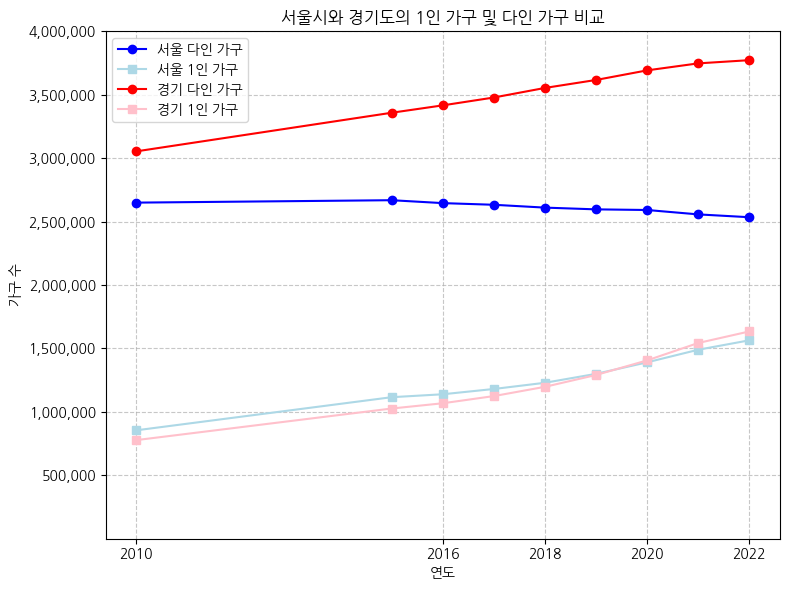

In [9]:
# plt를 사용한 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 서울특별시와 경기도 데이터 분리
seoul_data = seoul_gyeonggi[seoul_gyeonggi['sido'] == '서울특별시']
gyeonggi_data = seoul_gyeonggi[seoul_gyeonggi['sido'] == '경기도']

# 서울특별시 데이터 플로팅
plt.plot(seoul_data['year'], seoul_data['multi_person_household_count'], marker='o', label='서울 다인 가구', color='blue')
plt.plot(seoul_data['year'], seoul_data['one_person_household_count'], marker='s', label='서울 1인 가구', color='lightblue')

# 경기도 데이터 플로팅
plt.plot(gyeonggi_data['year'], gyeonggi_data['multi_person_household_count'], marker='o', label='경기 다인 가구', color='red')
plt.plot(gyeonggi_data['year'], gyeonggi_data['one_person_household_count'], marker='s', label='경기 1인 가구', color='pink')

# 그래프 제목 및 축 레이블 설정
plt.title('서울시와 경기도의 1인 가구 및 다인 가구 비교')
plt.xlabel('연도')
plt.ylabel('가구 수')

# 범례 추가
plt.legend()

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

arrYticks, txtYtick = plt.yticks()
plt.yticks (arrYticks, ["{:,.0f}".format(x) for x in arrYticks])

# x축 눈금 설정
plt.xticks(seoul_data['year'][::2])

# y축 범위 설정 (자동)
plt.ylim(bottom=0)

# 그래프 표시
plt.tight_layout()
plt.show()


# 가구 수 별 유입인구 시각화

In [56]:
# 서울시 데이터 필터링
# 전입 데이터에서 서울특별시 데이터만 추출하고, 2004년부터 2024년까지의 데이터로 제한
seoul_movein = movein_household[(movein_household['SIDO'] == '서울특별시') & (movein_household['YEAR'] >= 2004) & (movein_household['YEAR'] <= 2024)]
# 전출 데이터에서 서울특별시 데이터만 추출하고, 2004년부터 2024년까지의 데이터로 제한
seoul_moveout = moveout_household[(moveout_household['SIDO'] == '서울특별시') & (moveout_household['YEAR'] >= 2004) & (moveout_household['YEAR'] <= 2024)]

# 순이동 인구량 계산
# 전입 데이터와 전출 데이터를 연도, 월, 시도, 가구 유형을 기준으로 병합
seoul_net = seoul_movein.merge(seoul_moveout, on=['YEAR', 'MONTH', 'SIDO', 'HOUSEHOLD'], suffixes=('_movein', '_moveout'))
# 순이동 인구량 = 전입 인구 - 전출 인구
seoul_net['NET_MOVE'] = seoul_net['MOVE_AMOUNT_movein'] - seoul_net['MOVE_AMOUNT_moveout']

# 1인 가구와 그 외 가구로 구분
# 1인 가구 데이터만 추출
seoul_1person = seoul_net[seoul_net['HOUSEHOLD'] == '1인']
# 1인 가구를 제외한 나머지 가구 데이터 추출
seoul_others = seoul_net[seoul_net['HOUSEHOLD'] != '1인']

# 연도별 합계 계산
# 1인 가구의 연도별 순이동 인구량 합계 계산
seoul_1person_sum = seoul_1person.groupby('YEAR')['NET_MOVE'].sum().reset_index()
# 다인 가구의 연도별 순이동 인구량 합계 계산
seoul_others_sum = seoul_others.groupby('YEAR')['NET_MOVE'].sum().reset_index()

# 시각화
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=seoul_1person_sum['YEAR'], y=seoul_1person_sum['NET_MOVE'],
                         mode='lines+markers', name='1인 가구'))
fig.add_trace(go.Scatter(x=seoul_others_sum['YEAR'], y=seoul_others_sum['NET_MOVE'],
                         mode='lines+markers', name='다인 가구'))

fig.update_layout(title='서울시 1인 가구 vs 다인 가구 순이동 인구량 (2004-2024)',
                  xaxis_title='연도',
                  yaxis_title='순이동 인구량',
                  legend_title='가구 유형',
                  width=800)

fig.show()



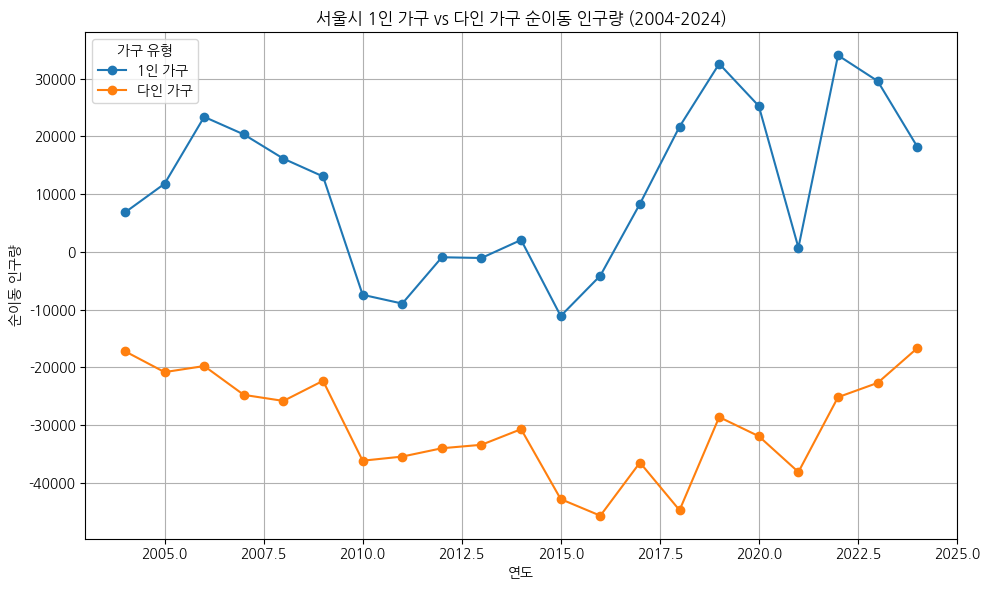

In [55]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(seoul_1person_sum['YEAR'], seoul_1person_sum['NET_MOVE'], marker='o', label='1인 가구')
plt.plot(seoul_others_sum['YEAR'], seoul_others_sum['NET_MOVE'], marker='o', label='다인 가구')

plt.title('서울시 1인 가구 vs 다인 가구 순이동 인구량 (2004-2024)')
plt.xlabel('연도')
plt.ylabel('순이동 인구량')
plt.legend(title='가구 유형')

plt.grid(True)
plt.tight_layout()
plt.show()


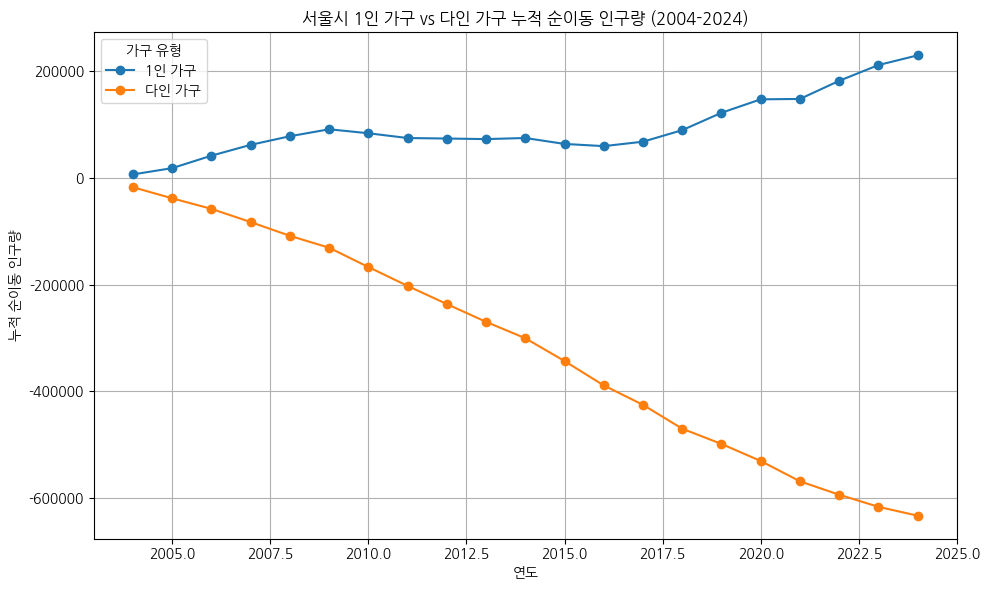

In [57]:
# 누적 순이동 인구량 계산
seoul_1person_sum['누적_순이동'] = seoul_1person_sum['NET_MOVE'].cumsum()
seoul_others_sum['누적_순이동'] = seoul_others_sum['NET_MOVE'].cumsum()

# 누적 순이동 인구량 시각화
plt.figure(figsize=(10, 6))

plt.plot(seoul_1person_sum['YEAR'], seoul_1person_sum['누적_순이동'], marker='o', label='1인 가구')
plt.plot(seoul_others_sum['YEAR'], seoul_others_sum['누적_순이동'], marker='o', label='다인 가구')

plt.title('서울시 1인 가구 vs 다인 가구 누적 순이동 인구량 (2004-2024)')
plt.xlabel('연도')
plt.ylabel('누적 순이동 인구량')
plt.legend(title='가구 유형')

plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
import json
geo_path  = "../data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding = "utf-8"))

import folium
from folium.plugins import HeatMap


# 지도 생성
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)



FileNotFoundError: [Errno 2] No such file or directory: '../data/starbucks_heat_data.csv'

# 사교육 시절 구별 숫자.

In [ ]:
# 지역별 교육업체 수 

conn  = pymysql.connect(host='', 
                        user='master', 
                        password, 
                        db='edaproject', 
                        charset='utf8')
cursor = conn.cursor()

query = """
    SELECT * FROM company_type_by_gu_yearly;
"""
cursor.execute(query)
result = cursor.fetchall()

company_by_gu = pd.DataFrame(result)
company_by_gu.columns = [desc[0] for desc in cursor.description]


conn.close()

In [94]:
company_by_gu

,gu,year,company_type,company_count,worker_count
0,강남구,2017,건설업,2071,55618
1,강남구,2017,공공행정 국방 및,57,6052
2,강남구,2017,교육 서비스업,3850,29001
3,강남구,2017,금융 및 보험업,1951,35865
4,강남구,2017,도매 및 소매업,17274,133772
...,...,...,...,...,...
2095,중랑구,2022,운수 및 창고업,6458,11235
2096,중랑구,2022,전기 가스 증기 및,10,108
2097,중랑구,2022,전문 과학 및 기술,1077,2760
2098,중랑구,2022,정보통신업,719,1849


In [15]:
company_by_gu["company_type"].unique()

array(['건설업', '공공행정 국방 및 ', '교육 서비스업', '금융 및 보험업', '도매 및 소매업',
       '보건업 및 사회복지', '사업시설 관리 사업', '소계', '숙박 및 음식점업', '운수 및 창고업',
       '전기 가스 증기 및', '전문 과학 및 기술', '정보통신업', '제조업'], dtype=object)

In [95]:
df = company_by_gu [company_by_gu["company_type"] == "교육 서비스업"]
# df [df["year"] == 2022]

In [24]:
import json
geo_path  = "../data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding = "utf-8"))

In [27]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=df,
    columns=["gu", 'company_count'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='인구밀도',
).add_to(my_map)

In [28]:
my_map

In [97]:
df_2017 = df[df['year'] == 2017]
df_2022 = df[df['year'] == 2022]

In [99]:
import pandas as pd

# 데이터프레임이 df라고 가정
# 2017년과 2022년 데이터 필터링
df_2017 = df[df['year'] == 2017]
df_2022 = df[df['year'] == 2022]

# 구별로 2017년과 2022년의 업체 수 차이 계산
increase_data = []

for gu in df['gu'].unique():
    # 각 구의 2017년, 2022년 데이터 추출
    company_2017 = df_2017[df_2017['gu'] == gu]['company_count'].values
    company_2022 = df_2022[df_2022['gu'] == gu]['company_count'].values
    
    # 데이터가 존재하는 경우에만 차이 계산
    if len(company_2017) > 0 and len(company_2022) > 0:
        increase = company_2022[0] - company_2017[0]
        increase_data.append({'gu': gu, 'company_increase': increase})

# 증가량 데이터를 데이터프레임으로 변환
increase_df = pd.DataFrame(increase_data)

In [101]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=increase_df,
    columns=["gu", 'company_increase'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='인구밀도',
).add_to(my_map)

In [102]:
my_map

# 구별 교육 사유 순 전입 인구수 증가수

In [ ]:
# 구별 교육 사유 전입 수 

conn  = pymysql.connect(host='', 
                        user='master', 
                        password, 
                        db='edaproject', 
                        charset='utf8')
cursor = conn.cursor()

query = """
    SELECT * FROM MOVEINOUT_BY_GU_REASON_YEARLY;
"""

cursor.execute(query)
result = cursor.fetchall()

moveinout_reason = pd.DataFrame(result)
moveinout_reason.columns = [desc[0] for desc in cursor.description]


conn.close()

In [92]:
moveinout_reason

,gu,reason,move_type,year,count
0,종로구,계,총전입,2013,24676
1,종로구,계,총전출,2013,30007
2,종로구,계,순이동,2013,-5331
3,종로구,계,시도간전입,2013,7952
4,종로구,계,시도간전출,2013,8681
...,...,...,...,...,...
112195,남제주군,기타,총전입,2023,0
112196,남제주군,기타,총전출,2023,0
112197,남제주군,기타,순이동,2023,0
112198,남제주군,기타,시도간전입,2023,0


In [48]:
#교육 필터링
moveinout_bystudy = moveinout_reason[moveinout_reason["reason"]=="교육"]
#계 필터링
moveinout_bytotal = moveinout_reason[moveinout_reason["reason"]=="계"]

In [53]:
moveinout_bystudy_puremove = moveinout_bystudy[moveinout_reason["move_type"] == "순이동"]
moveinout_bytotal_puremove = moveinout_bytotal[moveinout_bytotal["move_type"]== "순이동"]
mvoeinout_bystudy_movein  = moveinout_bystudy[moveinout_bystudy["move_type"] == "총전입"]
mvoeinout_bystudy_movein  = moveinout_bystudy[moveinout_bystudy["move_type"] == "총전입"]

/tmp/ipykernel_19683/2618652846.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [75]:
moveinout_bystudy_puremove = moveinout_bystudy_puremove [moveinout_bystudy_puremove ["year"]== 2023]
moveinout_bystudy_puremove

,gu,reason,move_type,year,count
102022,종로구,교육,순이동,2023,1232
102062,중구,교육,순이동,2023,563
102102,용산구,교육,순이동,2023,-165
102142,성동구,교육,순이동,2023,1122
102182,광진구,교육,순이동,2023,2134
...,...,...,...,...,...
112022,합천군,교육,순이동,2023,-137
112062,제주시,교육,순이동,2023,-1380
112102,서귀포시,교육,순이동,2023,130
112142,북제주군,교육,순이동,2023,0


In [74]:
gu_name = ['종로구',
 '중구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구']

In [83]:
mbp  = moveinout_bystudy_puremove.loc[moveinout_bystudy_puremove["gu"].isin(gu_name)] 
mbp

,gu,reason,move_type,year,count
102022,종로구,교육,순이동,2023,1232
102062,중구,교육,순이동,2023,563
102102,용산구,교육,순이동,2023,-165
102142,성동구,교육,순이동,2023,1122
102182,광진구,교육,순이동,2023,2134
102222,동대문구,교육,순이동,2023,4588
102262,중랑구,교육,순이동,2023,-3
102302,성북구,교육,순이동,2023,4147
102342,강북구,교육,순이동,2023,650
102382,도봉구,교육,순이동,2023,-96


In [104]:
df = mbp.groupby("gu")["count"].sum().reset_index()
df

,gu,count
0,강남구,4403
1,강동구,-203
2,강북구,650
3,강서구,-1105
4,관악구,4283
5,광진구,2134
6,구로구,-522
7,금천구,-108
8,노원구,3235
9,도봉구,-96


In [105]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=df,
    columns=["gu", 'count'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='인구밀도',
).add_to(my_map)

In [106]:
my_map

In [ ]:
# 구별 교육 사유 전입 수 

conn  = pymysql.connect(host='', 
                        user='master', 
                        password, 
                        db='edaproject', 
                        charset='utf8')
cursor = conn.cursor()

query = """
    SELECT * FROM UNIVERSITY_INFO;
"""

cursor.execute(query)
result = cursor.fetchall()

univ_info = pd.DataFrame(result)
univ_info.columns = [desc[0] for desc in cursor.description]


conn.close()

In [90]:
univ_info

,ID,YEAR,SCHOOLTYPE,NAME,CAMPUS,CLASS1,CLASS2,CLASS3,MAJOR,CAPACITY
0,1,2014,전문대학,충남도립청양대학,0,사회계열,경영ㆍ경제,경영ㆍ경제,토지행정과,40
1,2,2014,전문대학,충남도립청양대학,0,사회계열,사회과학,행정,경찰행정과,40
2,3,2014,전문대학,충남도립청양대학,0,사회계열,사회과학,행정,자치행정과,85
3,4,2014,전문대학,충남도립청양대학,0,공학계열,전기ㆍ전자,전자,전기전자과,40
4,5,2014,전문대학,충남도립청양대학,0,공학계열,컴퓨터ㆍ통신,정보ㆍ통신,건설정보과,40
...,...,...,...,...,...,...,...,...,...,...
82262,82263,2022,산업대학,청운대학교,0,예체능계열,응용예술,영상ㆍ예술,뷰티산업학과,14
82263,82264,2022,산업대학,청운대학교,0,예체능계열,연극ㆍ영화,연극ㆍ영화,연극예술학과,71
82264,82265,2022,산업대학,청운대학교,0,예체능계열,연극ㆍ영화,연극ㆍ영화,뮤지컬학과,35
82265,82266,2022,산업대학,청운대학교,0,예체능계열,연극ㆍ영화,연극ㆍ영화,방송영화영상학과,61


In [ ]:
# 구별 교육 사유 전입 수 
import pymysql
import pandas as pd


conn  = pymysql.connect(host='', 
                        user='master', 
                        password, 
                        db='edaproject', 
                        charset='utf8')
cursor = conn.cursor()

query = """
    SELECT * FROM SEOUL_DONG_PRICE_YEARLY;
"""

cursor.execute(query)
result = cursor.fetchall()

seoul_dong_price = pd.DataFrame(result)
seoul_dong_price.columns = [desc[0] for desc in cursor.description]


conn.close()

In [19]:
seoul_dong_price

,YEAR,GU,DONG,AVG_PRICE,GROWTH
0,2024,강남구,개포동,2226771809,229.8457
1,2023,강남구,개포동,1871364102,NaN
2,2022,강남구,개포동,2130712121,NaN
3,2021,강남구,개포동,2105346303,NaN
4,2020,강남구,개포동,1780246013,NaN
...,...,...,...,...,...
3441,2018,중랑구,중화동,374394594,NaN
3442,2017,중랑구,중화동,343133245,NaN
3443,2016,중랑구,중화동,324769458,NaN
3444,2015,중랑구,중화동,306010067,NaN


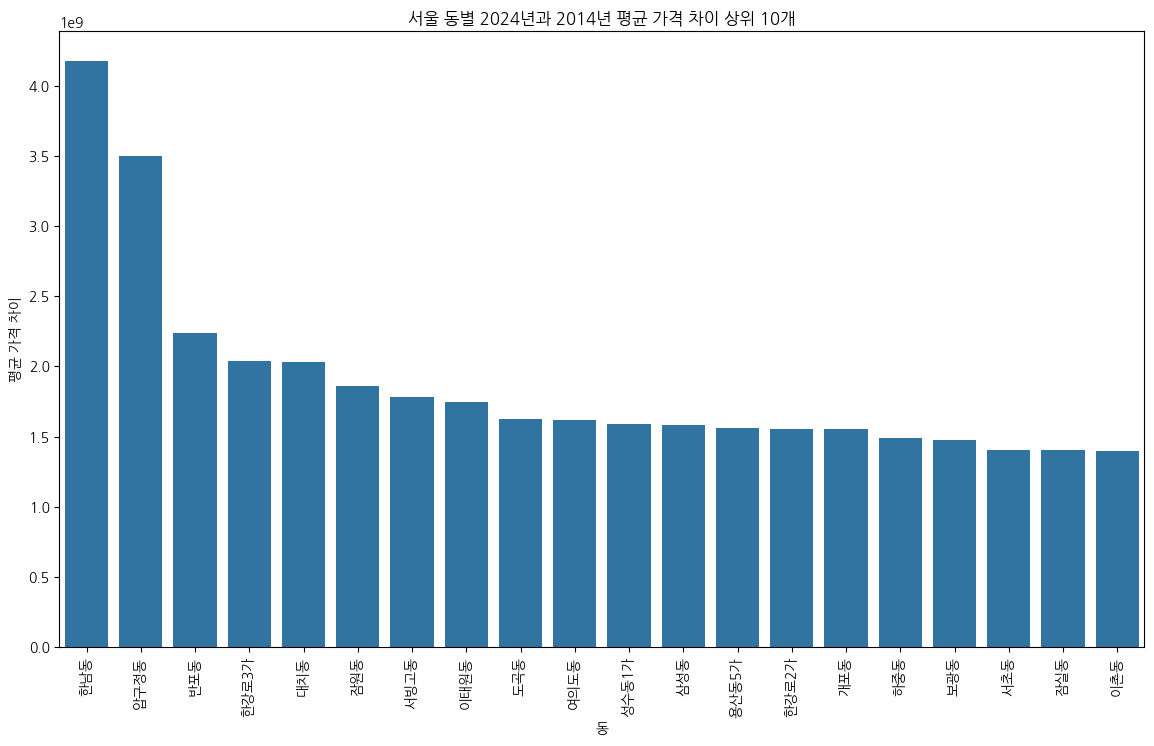

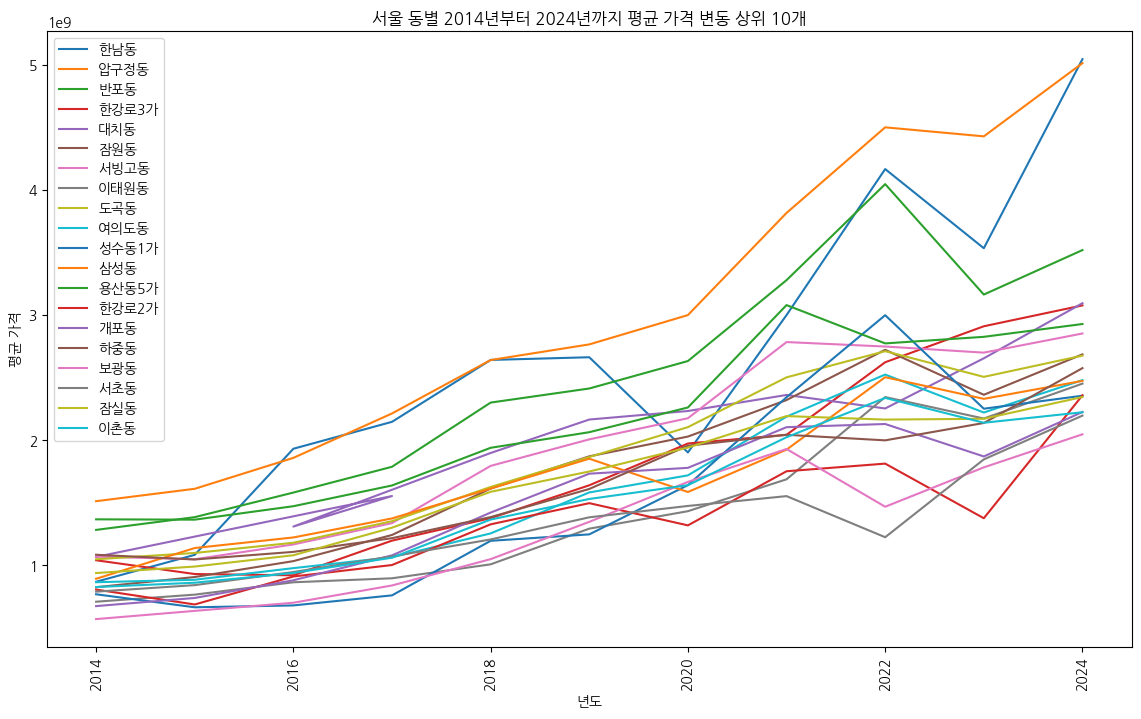

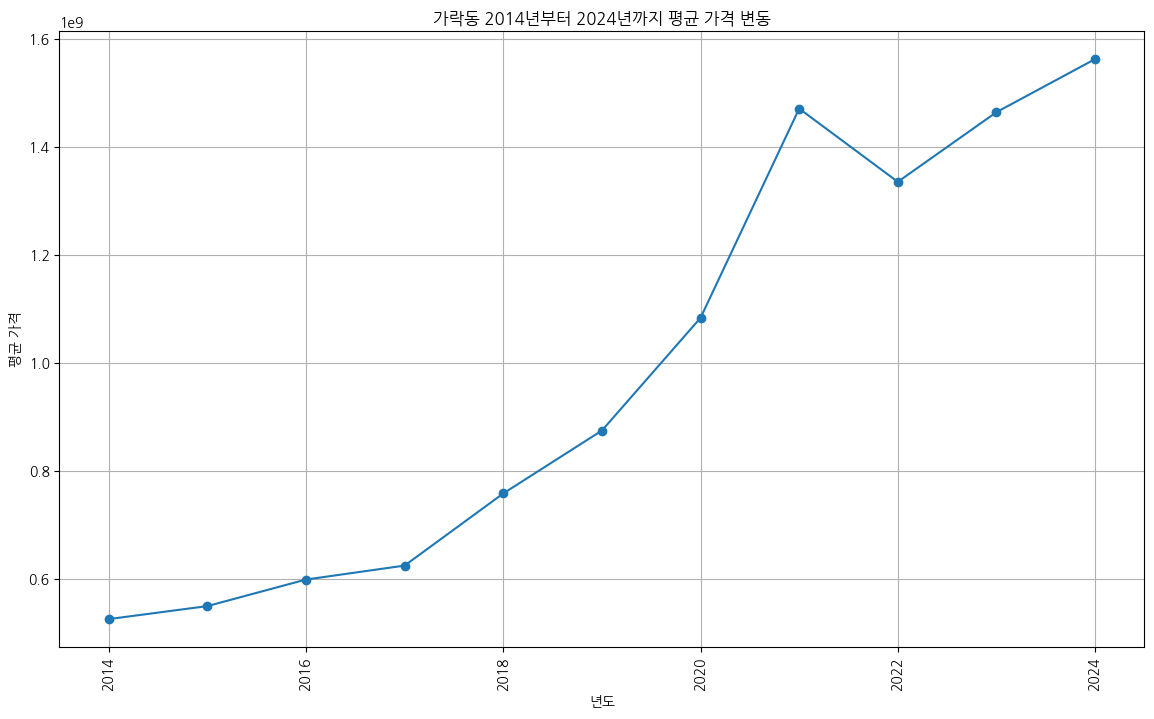

/tmp/ipykernel_12528/1363516365.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garak_dong_data['GROWTH_RATE'] = garak_dong_data['AVG_PRICE'].pct_change() * 100


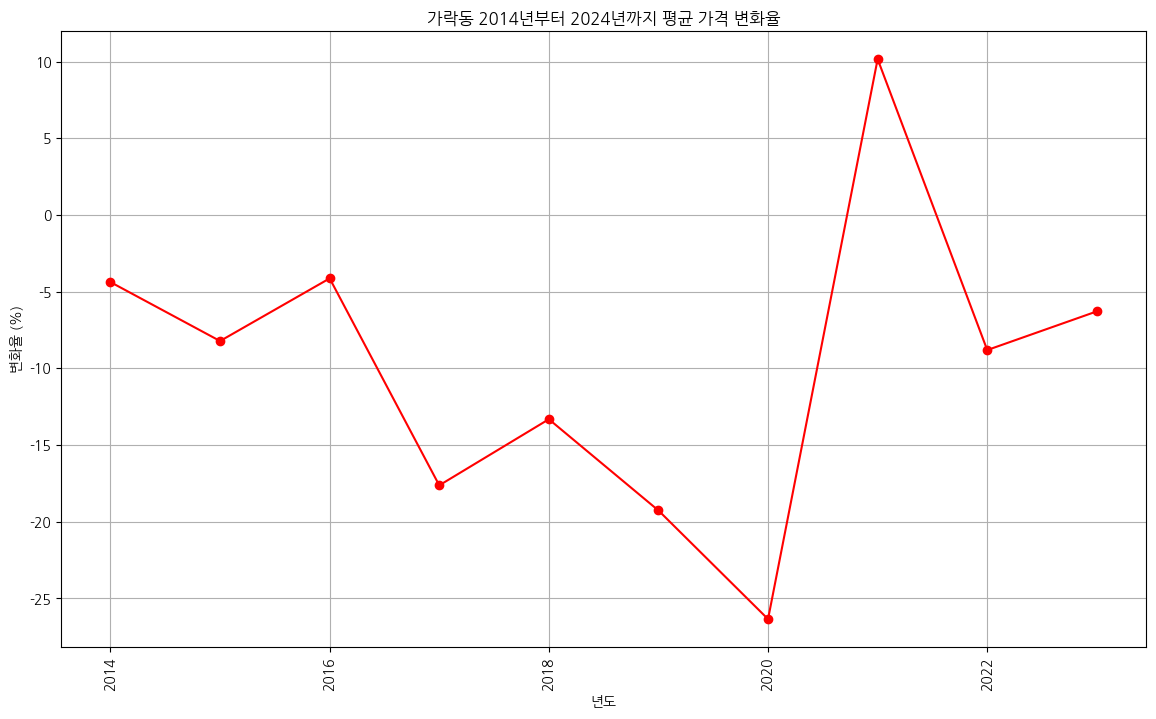

/tmp/ipykernel_12528/1363516365.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garak_dong_data['DIFF'] = garak_dong_data['AVG_PRICE'].diff()


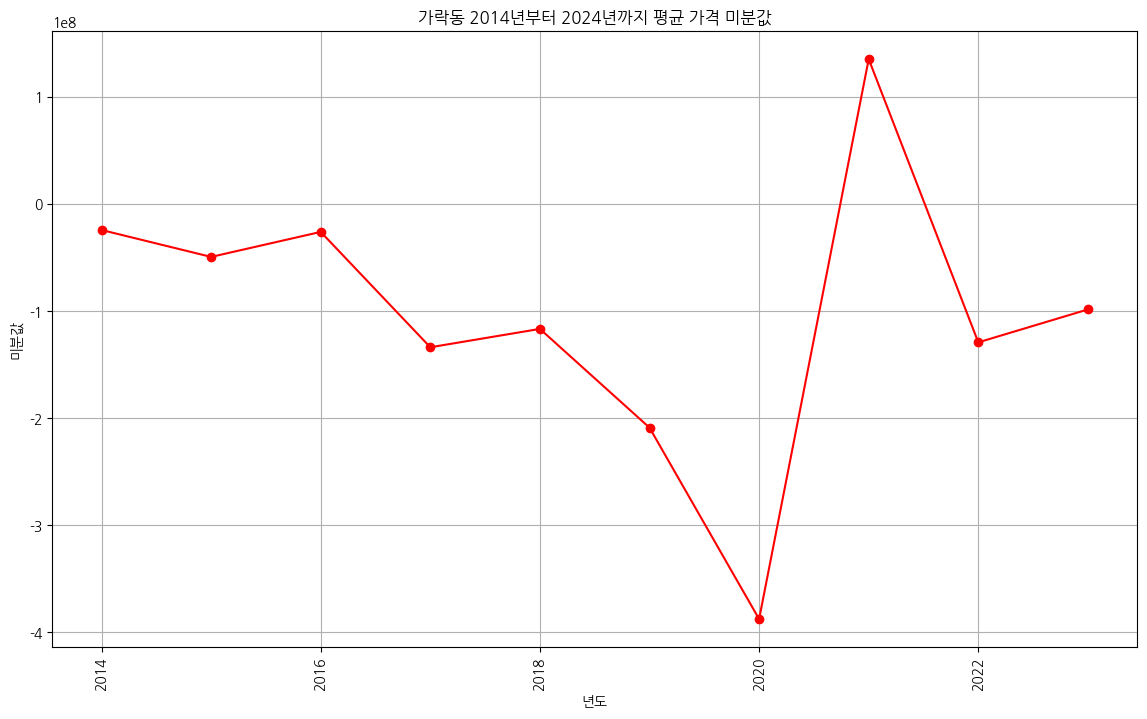

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 준비
seoul_dong_price['AVG_PRICE'] = seoul_dong_price['AVG_PRICE'].astype(float)

# 2024년에서 2014년 뺀 값 계산
price_diff = seoul_dong_price[seoul_dong_price['YEAR'] == 2024].set_index('DONG')['AVG_PRICE'] - seoul_dong_price[seoul_dong_price['YEAR'] == 2014].set_index('DONG')['AVG_PRICE']
price_diff = price_diff.reset_index().rename(columns={'AVG_PRICE': 'PRICE_DIFF'})

# 상위 10개 동 추출
top_10_dong = price_diff.nlargest(20, 'PRICE_DIFF')

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_dong, x='DONG', y='PRICE_DIFF')
plt.xticks(rotation=90)
plt.title('서울 동별 2024년과 2014년 평균 가격 차이 상위 10개')
plt.xlabel('동')
plt.ylabel('평균 가격 차이')
plt.show()
# 상위 10개 동의 가격 변동 시계열 그래프 시각화
plt.figure(figsize=(14, 8))

for dong in top_10_dong['DONG']:
    dong_data = seoul_dong_price[seoul_dong_price['DONG'] == dong]
    plt.plot(dong_data['YEAR'], dong_data['AVG_PRICE'], label=dong)

plt.legend()
plt.xticks(rotation=90)
plt.title('서울 동별 2014년부터 2024년까지 평균 가격 변동 상위 10개')
plt.xlabel('년도')
plt.ylabel('평균 가격')
plt.show()
# 가락동의 데이터 시각화
garak_dong_data = seoul_dong_price[seoul_dong_price['DONG'] == '가락동']

plt.figure(figsize=(14, 8))
plt.plot(garak_dong_data['YEAR'], garak_dong_data['AVG_PRICE'], marker='o')
plt.xticks(rotation=90)
plt.title('가락동 2014년부터 2024년까지 평균 가격 변동')
plt.xlabel('년도')
plt.ylabel('평균 가격')
plt.grid(True)
plt.show()


# 가락동 데이터 변화율 계산
garak_dong_data['GROWTH_RATE'] = garak_dong_data['AVG_PRICE'].pct_change() * 100

# 가락동 데이터 변화율 시각화
plt.figure(figsize=(14, 8))
plt.plot(garak_dong_data['YEAR'], garak_dong_data['GROWTH_RATE'], marker='o', color='r')
plt.xticks(rotation=90)
plt.title('가락동 2014년부터 2024년까지 평균 가격 변화율')
plt.xlabel('년도')
plt.ylabel('변화율 (%)')
plt.grid(True)
plt.show()



import numpy as np

garak_dong_data['DIFF'] = garak_dong_data['AVG_PRICE'].diff()

# 가락동 데이터 미분값 시각화
plt.figure(figsize=(14, 8))
plt.plot(garak_dong_data['YEAR'], garak_dong_data['DIFF'], marker='o', color='r')
plt.xticks(rotation=90)
plt.title('가락동 2014년부터 2024년까지 평균 가격 미분값')
plt.xlabel('년도')
plt.ylabel('미분값')
plt.grid(True)
plt.show()




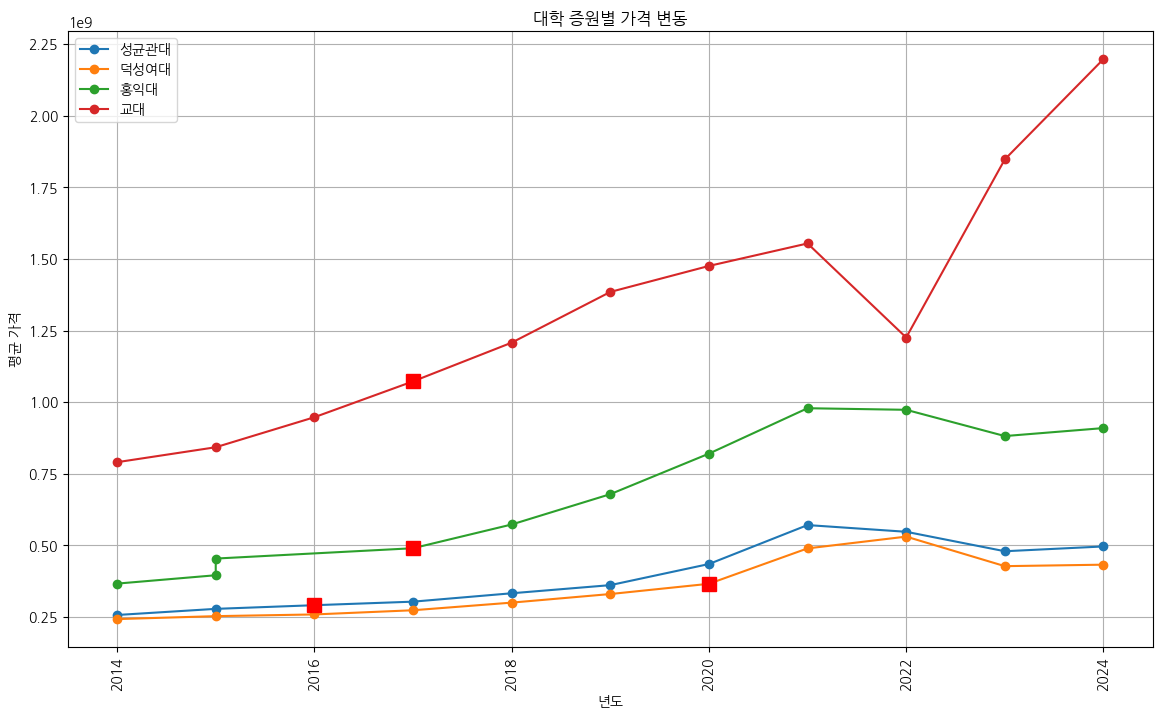

In [45]:
# 가락동의 데이터 시각화
garak_dong_data = seoul_dong_price[seoul_dong_price['DONG'] == '도봉동']
suyu_dong_data = seoul_dong_price[seoul_dong_price['DONG'] == '쌍문동']
sungsan_dong_data = seoul_dong_price[seoul_dong_price['DONG'] == '성산동']
seochu_dong_data = seoul_dong_price[seoul_dong_price['DONG'] == '서초동']

plt.figure(figsize=(14, 8))
plt.plot(garak_dong_data['YEAR'], garak_dong_data['AVG_PRICE'], marker='o')
plt.plot(suyu_dong_data['YEAR'], suyu_dong_data['AVG_PRICE'], marker='o')
plt.plot(sungsan_dong_data['YEAR'], sungsan_dong_data['AVG_PRICE'], marker='o')
plt.plot(seochu_dong_data['YEAR'], seochu_dong_data['AVG_PRICE'], marker='o')

plt.plot(garak_dong_data[garak_dong_data['YEAR'] == 2016]['YEAR'], garak_dong_data[garak_dong_data['YEAR'] == 2016]['AVG_PRICE'], 'rs', markersize=10, zorder=5)
plt.plot(suyu_dong_data[suyu_dong_data['YEAR'] == 2020]['YEAR'], suyu_dong_data[suyu_dong_data['YEAR'] == 2020]['AVG_PRICE'], 'rs', markersize=10, zorder=5)
plt.plot(sungsan_dong_data[sungsan_dong_data['YEAR'] == 2017]['YEAR'], sungsan_dong_data[sungsan_dong_data['YEAR'] == 2017]['AVG_PRICE'], 'rs', markersize=10, zorder=5)
plt.plot(seochu_dong_data[seochu_dong_data['YEAR'] == 2017]['YEAR'], seochu_dong_data[seochu_dong_data['YEAR'] == 2017]['AVG_PRICE'], 'rs', markersize=10, zorder=5)


plt.xticks(rotation=90)
plt.title('대학 증원별 가격 변동')
plt.xlabel('년도')
plt.legend(['성균관대', '덕성여대', '홍익대', '교대'])
plt.ylabel('평균 가격')
plt.grid(True)
plt.show()


In [28]:
price_diff

,DONG,PRICE_DIFF
0,가락동,1.037100e+09
1,가리봉동,2.836250e+08
2,가산동,2.978926e+08
3,가양동,4.606661e+08
4,갈월동,6.585000e+08
...,...,...
327,효창동,9.309280e+08
328,후암동,4.883333e+08
329,휘경동,3.985176e+08
330,흑석동,1.018401e+09
